# Hierarchical Clustering

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
uni= pd.read_csv("/8.Universities.csv")

In [3]:
uni.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [24]:
# create function to normalize the values
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [25]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(uni.iloc[:,1:])
df_norm.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterid
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000,0.000000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667,1.000000
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667,0.666667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000,0.000000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667,0.000000


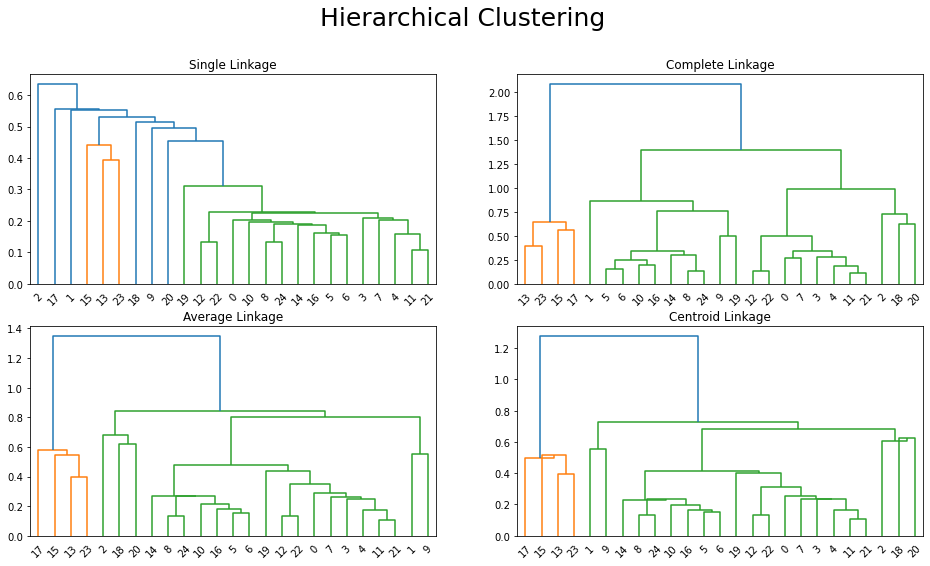

In [6]:
# create Dendrogram
fig = plt.figure(figsize=(16,8.5))
plt.suptitle('Hierarchical Clustering', size=25, y=0.99)
plt.subplot(2,2,1)
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))
plt.title('Single Linkage')

plt.subplot(2,2,2)
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))
plt.title('Complete Linkage')

plt.subplot(2,2,3)
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='average'))
plt.title('Average Linkage')

plt.subplot(2,2,4)
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='centroid'))
plt.title('Centroid Linkage');

In [26]:
# create clusters based on number and method given
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete') 
# 4 is no. of cluster,affinity is method of clustering and linkage is method-ward(centroid),single,complete,average

In [27]:
#segregating as per no. of cluster given and creating a data frame
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters.head()

,Clusters
0,1
1,2
2,0
3,1
4,1


In [31]:
# adding and creating a column of clusters segregated to the normalized data set 
df_norm['h_clusterid'] = hc.labels_
df_norm.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterid
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000,1
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667,2
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667,0
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000,1
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667,1


In [29]:
# adding and creating a column of clusters segregated to the original data set 
uni['h_clusterid'] = hc.labels_
uni.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterid
0,Brown,1310,89,22,13,22704,94,1
1,CalTech,1415,100,25,6,63575,81,2
2,CMU,1260,62,59,9,25026,72,0
3,Columbia,1310,76,24,12,31510,88,1
4,Cornell,1280,83,33,13,21864,90,1


In [30]:
hc.labels_

array([1, 2, 0, 1, 1, 3, 3, 1, 3, 3, 3, 1, 1, 0, 3, 0, 3, 0, 1, 3, 1, 1,
       1, 0, 3], dtype=int64)